In [1]:
import pandas
import pathlib
from matplotlib import pyplot as plt
from config import datadir

import scipy.optimize
import numpy
from tbcontrol.responses import fopdt, sopdt

In [2]:
excel_directory = pandas.read_excel(datadir/'Data Description.xlsx', parse_dates=True, index_col='Start Date') #Loads complete excel directory used to organise datasets
excel_directory

,End Date,Equipment,Type,Purpose,Filename,Run,Description
Start Date,,,,,,,
2019-12-06,2019-12-11,pH Probe,Raw,Test Drift on pH probe,20191206 pH Drift 1.txt,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Raw,Test Drift on pH probe,20191211 pH Drift 2.txt,2,"long run of pH probe drift, performed inside t..."
2019-12-17,2019-12-23,pH Probe,Raw,Test Drift on pH probe,20191217 pH Drift 3.txt,3,"long run of pH probe Drift, circulating ph7 bu..."
2020-01-16,2020-01-16,pH Probe,Raw,Step Test,20200116 pH Step 3.txt,3,pH stepped outside of rig
2020-01-14,2020-01-14,pH Probe,Raw,Step Test,20200114 pH Step 1.broken,1,"pH stepped outside of rig. Probe Broke, Dump run"
2020-01-15,2020-01-15,pH Probe,Raw,Step Test,20200115 pH Step 2.txt,2,pH stepped outside of rig
2020-01-01,2020-01-01,Pumps,Calibration,Calibration,Pump Calibration.xlsx,1,Calibration data for all pumps
2019-12-06,2019-12-11,pH Probe,Drift,Test Drift on pH probe,20191206 pH Drift 1.csv,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Drift,Test Drift on pH probe,20191211 pH Drift 2.csv,2,"long run of pH probe drift, performed inside t..."


In [3]:
steps = excel_directory[(excel_directory['Type']=='Step Test')]    # Creates a new directory of only the raw data files to be cleaned 
                                                            # Use '&' for multiple conditions

In [4]:
internal_steps = pandas.read_csv(datadir /'20200116 pH Step 3.csv')
internal_steps

,DateTime,Temp,pH,Boolean Dosing Pump,Gas Analyser CO2,Gas Analyser O2,Air Feed Rate,Feed Rpm,Dosing Rpm,Dosing average?
0,2020-01-16 13:28:52,294.924721,10.786179,1.0,-0.133883,20.509568,-0.579654,-0.267328,0.0,0.0
1,2020-01-16 13:28:53,294.942778,10.774530,1.0,-0.133290,20.505333,-0.580144,-0.263963,0.0,0.0
2,2020-01-16 13:28:54,294.973138,10.764867,1.0,-0.133203,20.509129,-0.579182,-0.284502,0.0,0.0
3,2020-01-16 13:28:55,295.034812,10.749010,1.0,-0.131788,20.513904,-0.579827,-0.325899,0.0,0.0
4,2020-01-16 13:28:56,295.084546,10.713271,1.0,-0.129265,20.510627,-0.582379,-0.342145,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
334796,2020-01-20 10:33:14,308.015229,8.382012,1.0,-0.145122,20.465213,-0.596105,-0.344398,0.0,0.0
334797,2020-01-20 10:33:15,308.015347,8.380403,1.0,-0.148401,20.465034,-0.595938,-0.303398,0.0,0.0
334798,2020-01-20 10:33:16,308.015760,8.380699,1.0,-0.147942,20.468310,-0.611222,-0.270270,0.0,0.0
334799,2020-01-20 10:33:17,308.015367,8.380578,1.0,-0.148446,20.467052,-0.611589,-0.345325,0.0,0.0


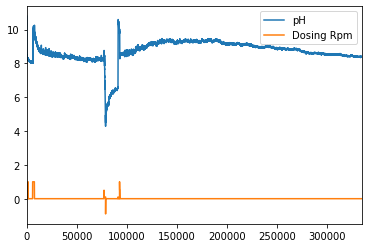

In [5]:
internal_steps.plot(y=["pH", "Dosing Rpm"])

In [6]:
internal_steps[(internal_steps["Dosing Rpm"]!=0)]

,DateTime,Temp,pH,Boolean Dosing Pump,Gas Analyser CO2,Gas Analyser O2,Air Feed Rate,Feed Rpm,Dosing Rpm,Dosing average?
1178,2020-01-16 13:48:30,304.557856,8.211083,1.0,-0.122124,20.670185,-0.587941,-0.295501,1.0,0.0
1179,2020-01-16 13:48:31,304.588619,8.216586,1.0,-0.122379,20.668007,-0.587557,-0.264440,1.0,0.0
1180,2020-01-16 13:48:32,304.606302,8.216451,1.0,-0.122131,20.668327,-0.596039,-0.264307,1.0,0.0
1181,2020-01-16 13:48:33,304.630525,8.213782,1.0,-0.121692,20.668526,-0.579626,-0.264970,1.0,0.0
1182,2020-01-16 13:48:34,304.631302,8.206565,1.0,-0.122514,20.668806,-0.579732,-0.264440,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
92982,2020-01-17 15:23:04,308.340229,8.521620,1.0,-0.123204,20.396903,-0.556424,-0.264705,0.5,0.0
92983,2020-01-17 15:23:05,308.340966,8.500358,1.0,-0.122210,20.394685,-0.563114,-0.260279,0.5,0.0
92984,2020-01-17 15:23:06,308.340425,8.487565,1.0,-0.121316,20.398042,-0.562113,-0.264095,0.5,0.0
92985,2020-01-17 15:23:07,308.339973,8.481872,1.0,-0.117474,20.395445,-0.564416,-0.264784,0.5,0.0


In [7]:
pump_times = []

for index, time in enumerate(internal_steps[(internal_steps["Dosing Rpm"]!=0)].index):
#     print(time[-2:])
    try:
        if (int(time) != (int(internal_steps[(internal_steps["Dosing Rpm"]!=0)].index[index+1])-1) or internal_steps["Dosing Rpm"][time] != internal_steps["Dosing Rpm"][time-1]) and internal_steps["Dosing Rpm"][time]==1:
            pump_times.append(time)
    except:
        pass

In [8]:
pump_times

[1178, 1187, 5737, 92730]

In [9]:
span = 20000

In [10]:
pump_spans = []

for time in pump_times:
    print(internal_steps["Dosing Rpm"][time], time)
    pump_spans.append([time, time+span])

1.0 1178
1.0 1187
1.0 5737
1.0 92730


In [11]:
pump_spans

[[1178, 21178], [1187, 21187], [5737, 25737], [92730, 112730]]

[-6.248357133293846e-09, 0.7867783821776625, 4984.669025528263, 7.74631008297181e-09]
[-6.250878202407287e-09, 0.7892539721648318, 4975.667255163918, 7.74938689464404e-09]
[-7.016696156913227e-09, 1.2707421712013904, 424.67120445123555, 8.829280174470418e-09]
[2.023099242693877e-09, 14.04672947257689, 194.44299014093951, 1.9472053342539013e-10]


<Figure size 432x288 with 0 Axes>

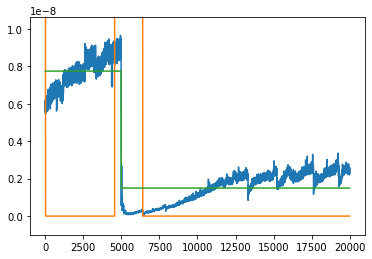

<Figure size 432x288 with 0 Axes>

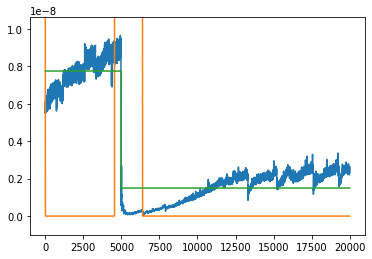

<Figure size 432x288 with 0 Axes>

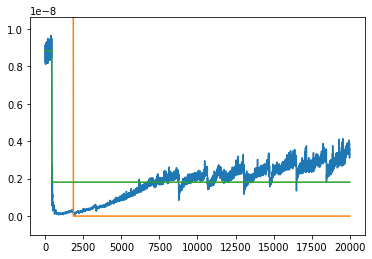

<Figure size 432x288 with 0 Axes>

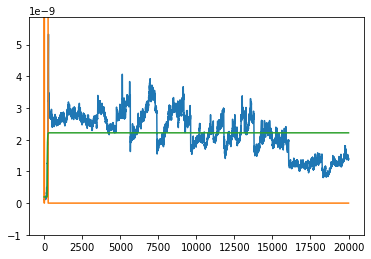

In [12]:
# spans=[[11800,12450],[12250,12750],[12750,13100],[13050,14000],[13600,15000],[15000,17000]]


ph_list = []
poh_list = []
ph_delogged = []
poh_delogged = []
time_list = []

K_list, tau_list, theta_list, y0_list = [], [], [], []

for span in pump_spans:
    lower = span[0]
    upper = span[1]
    
    time_set = numpy.array(internal_steps['DateTime'][lower:upper].index.tolist())-lower
    ph_set = numpy.array(internal_steps['pH'][lower:upper].values)
    poh_set = 14 - ph_set
    ph_delogged_set = 10**(-ph_set)
    poh_delogged_set = 10**(-poh_set)
    
    dosing_set = numpy.array(internal_steps['Dosing Rpm'][lower:upper].values)
    
#     print (poh_set)
    
    time_list.append(time_set)
    
    ph_list.append(ph_set)
    poh_list.append(poh_set)
    
    ph_delogged.append(ph_delogged_set)
    poh_delogged.append(poh_delogged_set)
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, time_set, 
                                                      ph_delogged_set, [0.004, 4, 200, 50])
    
    K_list.append(K)
    tau_list.append(tau)
    theta_list.append(theta)
    y0_list.append(y0)
    
    print([K, tau, theta, y0])
    
    figure = plt.figure()
    
    plt.figure()
    plt.ylim(-1e-9,max(ph_delogged_set)*1.1)
    plt.plot(time_set, ph_delogged_set)
    plt.plot(time_set, dosing_set)
    plt.plot(fopdt(time_set, K, tau, theta, y0))
    


In [13]:
K = numpy.average(K_list[:-1])
tau = numpy.average(tau_list[:-1])
K, tau

(-6.50531049753812e-09, 0.9489248418479616)

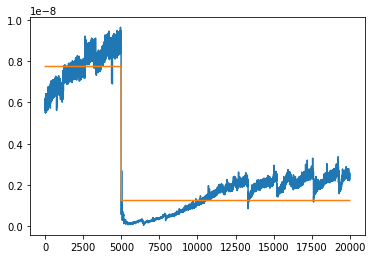

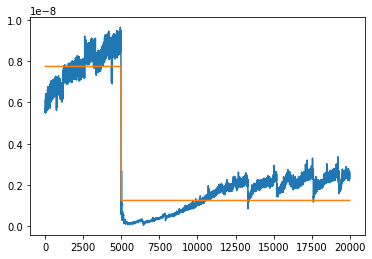

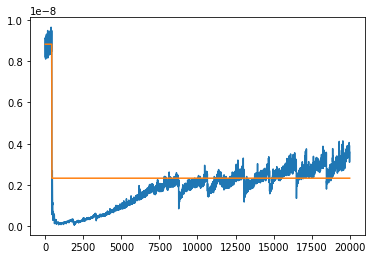

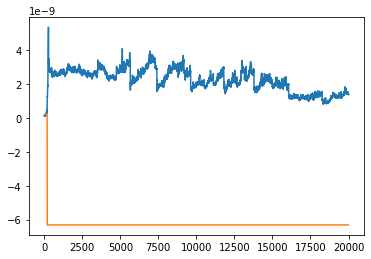

In [14]:
for time_set, ph_delogged_set, theta, y0 in zip(time_list, ph_delogged, theta_list, y0_list):
    figure = plt.figure()
    
    plt.plot(time_set, ph_delogged_set)
    plt.plot(fopdt(time_set, K, tau, theta, y0))